# Réseaux de Neurones - CIFAR-10

## Introduction et Réseau de Neurones Denses

In [73]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [74]:

# config = tf.compat.v1.ConfigProto(device_count={'GPU': 2, 'CPU': 4})
# sess = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(sess)

[[6]
 [9]
 [9]
 [4]
 [1]]


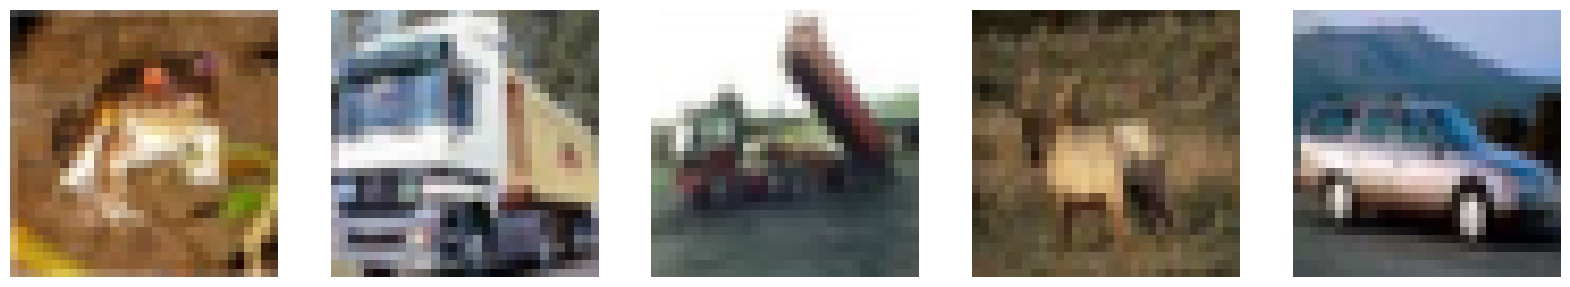

In [75]:
import matplotlib.pyplot as plt
import numpy as np
def display_row(*imgs):
    _, ax = plt.subplots(1, len(imgs), figsize=(20, 20))
    if not isinstance(ax, np.ndarray):
        ax = np.array([ax])
    for i, img in enumerate(imgs):
        ax[i].imshow(img)
        ax[i].axis('off')

display_row(x_train[0], x_train[1], x_train[2], x_train[3], x_train[4])
print(y_train[:5])

In [76]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [77]:
print(x_test.dtype)
print(y_test.dtype)

uint8
uint8


In [78]:
print("Nombre de classes : ", len(np.unique(y_train)))
print("Classes : ", np.unique(y_train))

Nombre de classes :  10
Classes :  [0 1 2 3 4 5 6 7 8 9]


In [79]:
# Pré-traitement des données

x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_23 (Flatten)        (None, 3072)              0         
                                                                 
 dense_48 (Dense)            (None, 256)               786688    
                                                                 
 dense_49 (Dense)            (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8825 - accuracy: 0.3273
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7089 - accuracy: 0.3912
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6477 - accuracy: 0.4125
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6139 - accuracy: 0.4260
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5820 - accuracy: 0.4387
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5679 - accuracy: 0.4427
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5455 - accuracy: 0.4505
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5286 - accuracy: 0.4547
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5175 - accuracy: 0.4615
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.504

In [82]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 1.5235 - accuracy: 0.4604
Test accuracy: 0.4603999853134155
Test loss: 1.523502230644226


In [83]:
predictions = model.predict(x_test)
print("Première image :")
print("\t" , predictions[0])

313/313 [==============================] - 0s 1ms/step
Première image :
	 [0.05332143 0.02758652 0.12385514 0.29565603 0.02694286 0.21743278
 0.15409723 0.0009146  0.09776386 0.00242957]


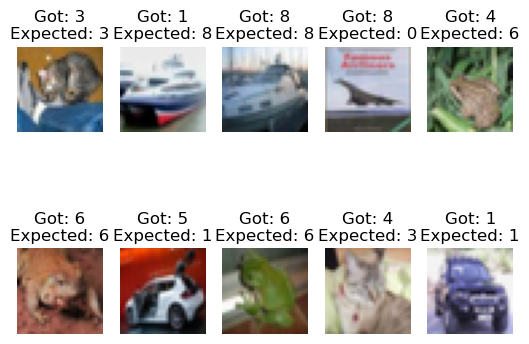

In [84]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Got: " + str(np.argmax(predictions[i])) + "\nExpected: " + str(np.argmax(y_test[i])))
    plt.imshow(x_test[i])
    plt.axis('off')
plt.show()

## Réseaux de Neurones Convolutionnels (CNN)

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train)

In [123]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 activation_10 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 10, 10, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_62 (Dropout)        (None, 10, 10, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 8, 8, 64)        

In [124]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(datagen.flow(x_train, y_train, batch_size=16), epochs=15, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/15


2023-12-11 10:52:14.290408: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/dropout_62/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1561/1563 [============================>.] - ETA: 0s - loss: 1.4066 - accuracy: 0.5089
Epoch 1: val_accuracy improved from -inf to 0.56300, saving model to best_model.keras
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4062 - accuracy: 0.5090 - val_loss: 1.2818 - val_accuracy: 0.5630
Epoch 2/15
1561/1563 [============================>.] - ETA: 0s - loss: 1.0535 - accuracy: 0.6297
Epoch 2: val_accuracy improved from 0.56300 to 0.64410, saving model to best_model.keras
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0534 - accuracy: 0.6298 - val_loss: 1.0802 - val_accuracy: 0.6441
Epoch 3/15
1563/1563 [==============================] - ETA: 0s - loss: 0.9432 - accuracy: 0.6703
Epoch 3: val_accuracy did not improve from 0.64410
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9432 - accuracy: 0.6703 - val_loss: 1.0973 - val_accuracy: 0.6263
Epoch 4/15
1561/1563 [============================>.] - ETA: 0s - loss: 0.8742 - accur

In [125]:
model.load_weights("best_model.keras")
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.7201 - accuracy: 0.7564
Test accuracy: 0.7563999891281128
Test loss: 0.720085084438324


313/313 [==============================] - 0s 1ms/step
Première image :
	 [0.00085783 0.0371773  0.05018238 0.48241577 0.00687988 0.08083928
 0.05653117 0.0072824  0.25982627 0.01800782]


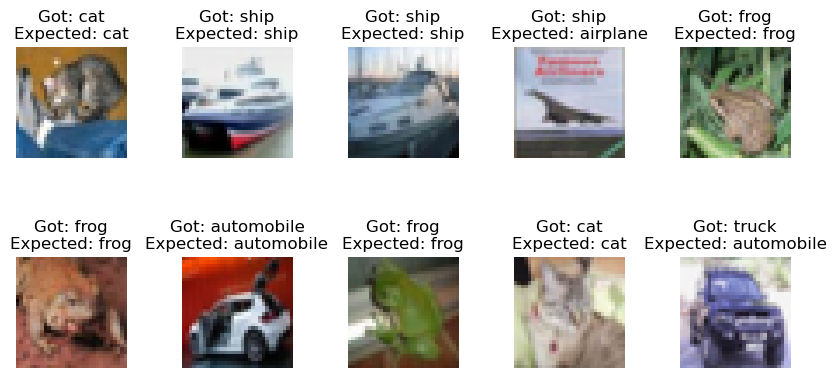

In [126]:
predictions = model.predict(x_test)
print("Première image :")
print("\t" , predictions[0])

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
to = lambda i: classes[i]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Got: " + to(np.argmax(predictions[i])) + "\nExpected: " + to(np.argmax(y_test[i])))
    plt.imshow(x_test[i])
    plt.axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [127]:
# Matrice de confusion